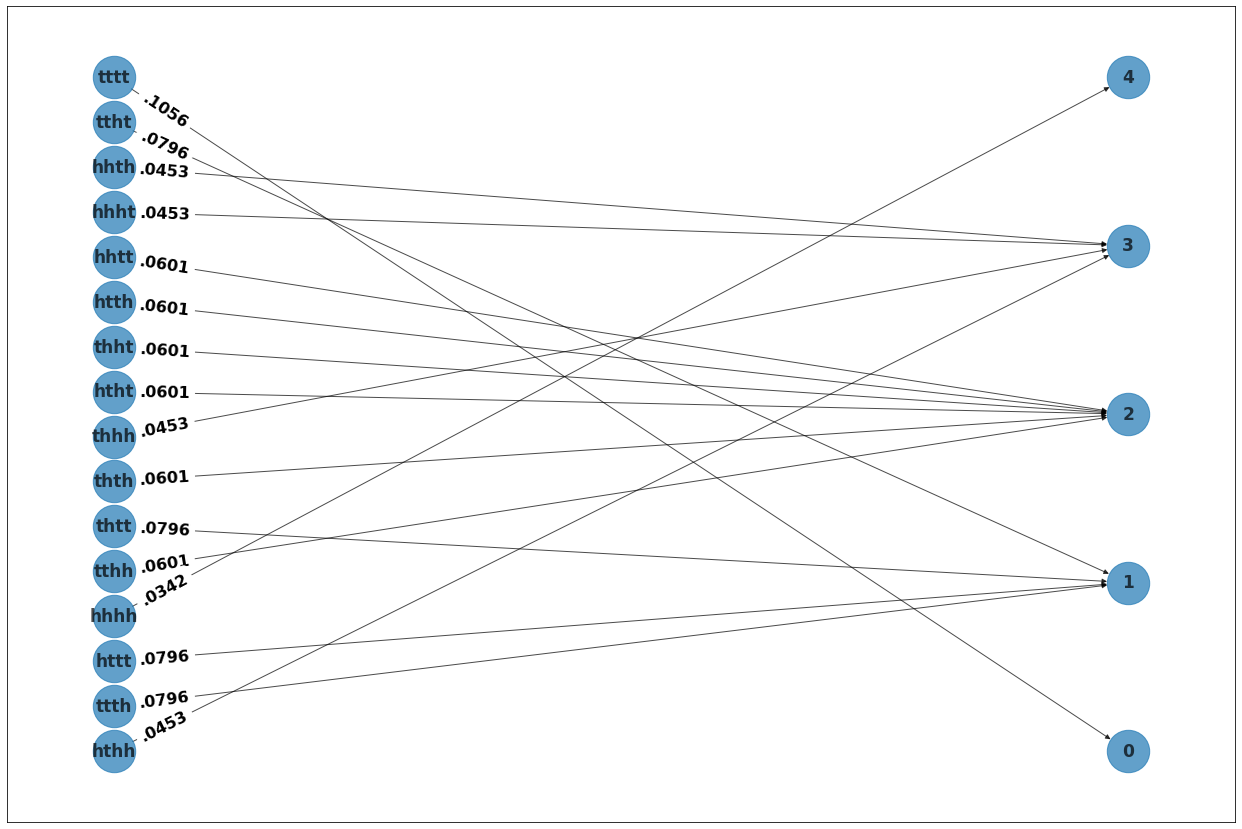

In [35]:
import itertools
import collections

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from scipy.stats import binom

n, p = 4, .43

def make_graph(n, p):
    graph_tuples = []
    nodes = []
    source_nodes = []
    destination_nodes = np.arange(n+1)
    edges = []
    edge_labels = collections.OrderedDict()

    for outcome in itertools.product('th', repeat=n):
        source_node = "".join(outcome) # turns eg., ('t', 'h', 'h', 't') into 'thht'
        destination_node = collections.Counter(outcome)['h']
        probability = p**destination_node * (1-p)**(n-destination_node)
        source_nodes.append(source_node)
        edges.append((source_node, destination_node))
        edge_labels[source_node, destination_node] = f"{probability:.4f}".lstrip("0")

    fig, ax = plt.subplots(figsize=(22, 15))
    B = nx.DiGraph()
    B.add_edges_from(edges)
    pos = nx.bipartite_layout(B, source_nodes)
    pos = collections.OrderedDict(sorted(pos.items(), key=lambda x: str(x), reverse=True))
    nx.draw_networkx(B, pos=pos, node_size=1800, alpha=.7, font_size=17, font_weight="bold", ax=ax)
    nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels, font_size=16, font_weight='bold', label_pos=.95)
    plt.show()
make_graph(n, p)

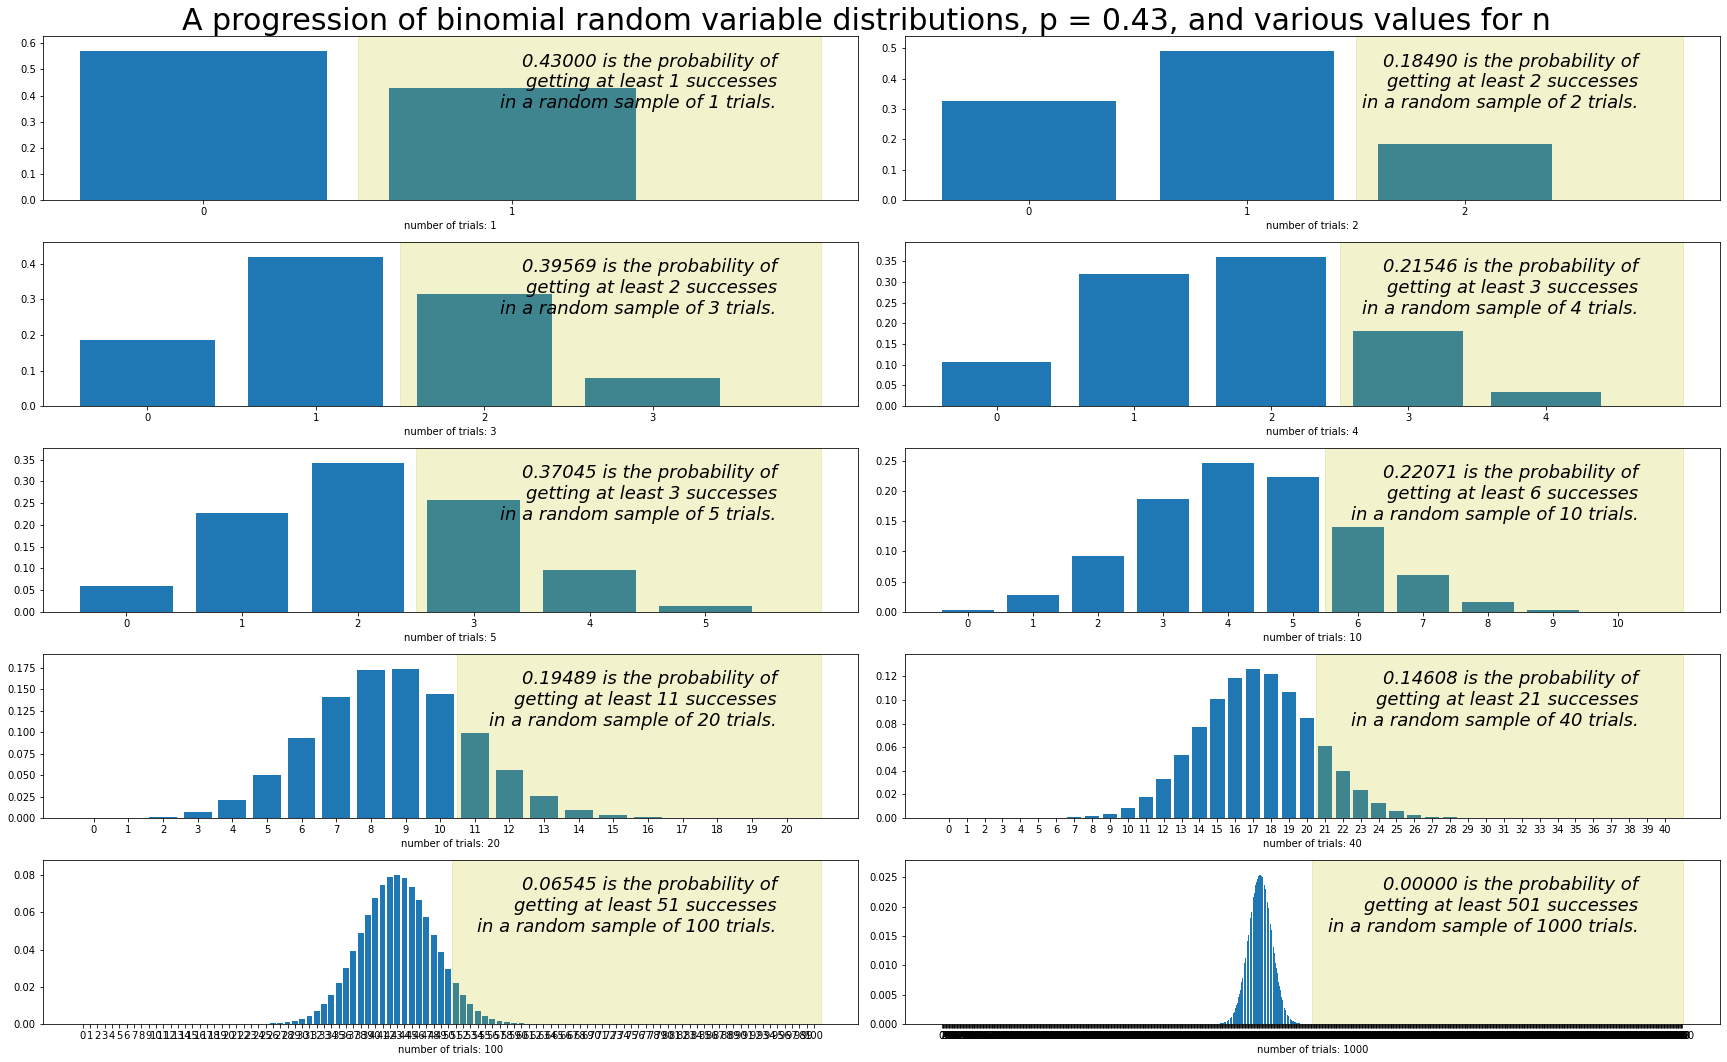

In [39]:
fig, axes = plt.subplots(5, 2, figsize=(24, 15))

fig.suptitle(f'A progression of binomial random variable distributions, p = {p}, '
             'and various values for n', fontsize=30)

for n_, ax in zip((1, 2, 3, 4, 5, 10, 20, 40, 100, 1000), axes.reshape(-1)):
    x = np.arange(n_ + 1)
    y = binom.pmf(x, n_, p)
    ax.bar(x, y)
    ax.set_xticks(x)
    ax.set_ylim(0, y.max()*1.1)
    ax.set_xlabel(f"number of trials: {n_}")
    # uncomment this last part of the for-loop to get the shaded regions with text
    # ax.axvspan(n_//2 + 1 - .5, n_+1, color='y', alpha=.2)
    # text_to_add = (
    #     f'{1 - binom.cdf(n_//2, n_, p):.5f} is the probability of\n'
    #     f'getting at least {n_//2 + 1} successes\n'
    #     f'in a random sample of {n_} trials.'
    # )
    # ax.text(.9, .9, text_to_add,
    #     style='italic',
    #     verticalalignment ='top',
    #     horizontalalignment ='right',
    #     transform = ax.transAxes,
    #     fontsize = 18)

plt.tight_layout()
plt.show()